# **Aplicación de técnicas de machine learning para la predicción del riesgo de default de un cliente en una compañía de filipinas**

Realizado por: 

* Andrés Medina Báez       cc 1036654885
* Manuela Ramírez Quiceno  cc 1037657504

# 1.Introducción






Home Credit es una empresa de filipinas que busca ofrecer créditos a personas con antecedentes crediticios insuficientes o inexistentes, buscando la inclusión financiera de la población no bancarizada.

Para ello, esta compañía busca utilizar información transaccional y de telecomunicaciones, con el fin de predecir el riesgo de default de sus clientes.


**Principal Objetivo**: ¿Al cliente, le debo o no de otorgar el préstamo a partir de su riesgo de default? 


**Variable Objetivo**: Probabilidad de que el cliente presente retrasos en el pago de su cuota  (1) o no (0)

# 2.Importar librerias

Las librerías a usar en la carga de los datos son:



*   pandas: Para cargar los datos en dataframes.
*   numpy: Para operaciones con matrices, filas y/o columnas
*   matplotlib: Para graficar
*   os: Para interactuar con diferentes rutas
*plotly: Para graficar la matriz de correlación
*sklearn: Para hacer la separación de la data en train y test, y para los modelos de ML y las métricas de evaluación.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import plotly.express as px
from sklearn.feature_selection import SelectKBest,f_classif
# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
# Selected algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#Importar GridSearch 
from sklearn.model_selection import GridSearchCV
#SMOTE
from imblearn.over_sampling import SMOTE

# 3.Cargar la Data

Se carga el archivo de salida del notebook 09-Preprocesamiento_Data_Elegida.ipynb

In [ ]:
data = pd.read_csv("06-DF_Final_60cols.csv",index_col=0) # Read data
data_original=data.copy()
data.head(5)

,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_CREDIT_x,DAYS_BIRTH,MONTHS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,...,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,NAME_PRODUCT_TYPE_walk-in,ind_vel_monto_cr,WALLSMATERIAL_MODE_DUROS,WALLSMATERIAL_MODE_ARMABLES,OCCUPATION_TYPE_BAJO,OCCUPATION_TYPE_MEDIO,OCCUPATION_TYPE_ALTO,indice_falta_pagar
0,1,0,0.0,406597.5,26.0,21.0,2,0.262949,1,1,...,0.0,1.0,0.0,1.000000,1,0,1,0,0,0.284122
1,0,0,0.0,1293502.5,46.0,40.0,1,0.622246,0,0,...,1.0,2.0,0.0,1.000000,1,0,0,1,0,0.000000
2,0,1,0.0,135000.0,52.0,8.0,2,0.555912,0,0,...,0.0,1.0,0.0,1.000000,0,0,1,0,0,0.000000
3,0,0,0.0,312682.5,52.0,101.0,2,0.650442,0,0,...,3.0,2.0,0.0,1.000000,0,0,1,0,0,0.000000
4,0,0,0.0,513000.0,55.0,101.0,2,0.322738,0,0,...,4.0,2.0,1.0,1.037038,0,0,0,1,0,0.000000


##### Revisa Carga de la Data

In [ ]:
Category=['TARGET','NAME_INCOME_TYPE_Businessman','NAME_INCOME_TYPE_Commercial associate',\
          'NAME_INCOME_TYPE_Others','NAME_INCOME_TYPE_Pensioner',\
          'NAME_INCOME_TYPE_Working','NAME_EDUCATION_TYPE_Higher education',\
          'NAME_EDUCATION_TYPE_Incomplete higher','NAME_EDUCATION_TYPE_Lower secondary',\
          'NAME_EDUCATION_TYPE_Secondary / secondary special','NAME_HOUSING_TYPE_House / apartment',\
          'NAME_HOUSING_TYPE_Rented apartment','NAME_HOUSING_TYPE_With parents',\
          'FONDKAPREMONT_MODE_org spec account','FONDKAPREMONT_MODE_reg oper account',\
          'FONDKAPREMONT_MODE_reg oper spec account','HOUSETYPE_MODE_specific housing',\
          'WALLSMATERIAL_MODE_Others','WALLSMATERIAL_MODE_DUROS','WALLSMATERIAL_MODE_ARMABLES',\
          'OCCUPATION_TYPE_BAJO','OCCUPATION_TYPE_MEDIO','OCCUPATION_TYPE_ALTO',\
          'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','CREDIT_TYPE_Microloan','CREDIT_TYPE_Mortgage',\
          'NAME_CLIENT_TYPE_New','FLAG_OWN_CAR','REGION_RATING_CLIENT_W_CITY',\
          'NAME_INCOME_TYPE_State servant','HOUSETYPE_MODE_block of flats']

Float=['CNT_CHILDREN','AMT_CREDIT_x','DAYS_BIRTH','MONTHS_EMPLOYED',\
       'EXT_SOURCE_2','DAYS_CREDIT',\
       'AMT_CREDIT_SUM_OVERDUE','DAYS_CREDIT_UPDATE','CREDIT_ACTIVE_Active','CREDIT_ACTIVE_Closed',\
       'CREDIT_TYPE_Another type of loan','CREDIT_TYPE_Consumer credit',\
       'AMT_ANNUITY','RATE_DOWN_PAYMENT',\
       'AMT_DOWN_PAYMENT','CNT_PAYMENT','DAYS_DECISION','DAYS_FIRST_DRAWING',\
       'DAYS_TERMINATION','NAME_CONTRACT_STATUS_Approved',\
       'NAME_CONTRACT_STATUS_Canceled','NAME_CONTRACT_STATUS_Refused',\
       'NAME_PORTFOLIO_Cards','NAME_PORTFOLIO_Cash',\
       'NAME_PORTFOLIO_POS','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']


for i in Category: 
  data[i]=data[i].astype('category')

for i in Float: 
  data[i]=data[i].astype('float64')

In [ ]:
Cuantitativas=Float
Cualitativas=Category

In [ ]:
data.shape

(295221, 60)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295221 entries, 0 to 295236
Data columns (total 60 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   TARGET                                             295221 non-null  category
 1   FLAG_OWN_CAR                                       295221 non-null  category
 2   CNT_CHILDREN                                       295221 non-null  float64 
 3   AMT_CREDIT_x                                       295221 non-null  float64 
 4   DAYS_BIRTH                                         295221 non-null  float64 
 5   MONTHS_EMPLOYED                                    295221 non-null  float64 
 6   REGION_RATING_CLIENT_W_CITY                        295221 non-null  category
 7   EXT_SOURCE_2                                       295221 non-null  float64 
 8   DEF_30_CNT_SOCIAL_CIRCLE                           295221 non-nu

In [ ]:
data.isnull().sum().sum()

0

##### Select KBest

In [ ]:
X=data.drop("TARGET", axis=1)
Y=data["TARGET"]

selector=SelectKBest(score_func=f_classif,k=15)
X_nuevo=selector.fit_transform(X,Y)

cols=selector.get_support(indices=True)
X.iloc[:,cols].columns

Index(['DAYS_BIRTH', 'MONTHS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY',
       'EXT_SOURCE_2', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special', 'DAYS_CREDIT',
       'CREDIT_TYPE_Microloan', 'NAME_CONTRACT_STATUS_Refused',
       'NAME_PRODUCT_TYPE_walk-in', 'ind_vel_monto_cr', 'OCCUPATION_TYPE_BAJO',
       'indice_falta_pagar'],
      dtype='object')

In [ ]:
#Para data utilizando K-Best
X = data[['DAYS_BIRTH', 'MONTHS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY',\
        'EXT_SOURCE_2', 'NAME_INCOME_TYPE_Pensioner',\
        'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',\
        'NAME_EDUCATION_TYPE_Secondary / secondary special', 'DAYS_CREDIT',\
        'CREDIT_TYPE_Microloan', 'NAME_CONTRACT_STATUS_Refused',\
        'NAME_PRODUCT_TYPE_walk-in', 'ind_vel_monto_cr', 'OCCUPATION_TYPE_BAJO',\
        'indice_falta_pagar']].copy()
y= data["TARGET"]

In [ ]:
X.shape, y.shape

((295221, 15), (295221,))

# 4.Partición de la data en train y test

Teniendo en cuenta que nos estamos enfrentando a un problema de data desbalanceada, se realiza la partición garantizando un muestreo estratificado para la variable TARGET

## Split dataset 70/30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state =42, stratify=y)

In [ ]:
perc_test = y_test.value_counts()[1]*100/len(y_test)
perc_train = y_train.value_counts()[1]*100/len(y_train)

print(f"Porcentaje de muestras positivas en el dataset de train={round(perc_test,4)} , y de test={round(perc_train,4)}")

Porcentaje de muestras positivas en el dataset de train=8.0752 , y de test=8.0753


##### Balanceo de los Datos

Se debe realizar un balanceo de los datos, toda vez que nuestra variable objetivo "Cae (1) o no Cae (0) en default", está desbalanceada: 

In [ ]:
num_1=data[data['TARGET']==1]['TARGET'].count()
num_0=data[data['TARGET']==0]['TARGET'].count()
print('''El número de registros los cuales se clasifican como clientes que presentan retraso en las cuotas del préstamo son {}
El número de registros los cuales se clasifican como clientes que no presentan retraso en las cuotas del préstamo son {}'''.format(num_1,num_0))

El número de registros los cuales se clasifican como clientes que presentan retraso en las cuotas del préstamo son 23840
El número de registros los cuales se clasifican como clientes que no presentan retraso en las cuotas del préstamo son 271381


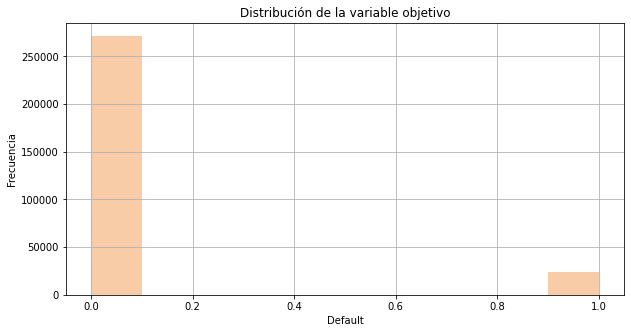

In [ ]:
vo=data['TARGET']
plt.figure(figsize=(10,5))
plt.hist(vo,alpha=0.6, color='#F2AB6D')
plt.title('Distribución de la variable objetivo')
plt.xlabel('Default')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

De lo anterior, se observa que en los datos de entrenamiento hay un porcentaje mucho mayor de datos de la clase 0 que de la clase 1, lo cual es indicativo de un problema de clases desbalanceadas

In [ ]:
print('''Porcentaje de datos de la clase 0: {}%
Porcentaje de datos de la clase 1: {}%'''.format(round(100*num_0/data.shape[0],2),round(100*num_1/data.shape[0],2)))

Porcentaje de datos de la clase 0: 91.92%
Porcentaje de datos de la clase 1: 8.08%


###### Smote

In [ ]:
sm=SMOTE()
X_s,y_s=sm.fit_resample(X_train,y_train)

In [ ]:
X_s.shape


(379932, 15)

In [ ]:
y_s.shape

(379932,)

In [ ]:
X_s.isnull().sum().sum()

302080

Se procede a organizar los NaN que quedaron en las variables Categoricas una vez se realizó el over sampling

In [ ]:
for i in X_s.columns:
  print(i,' ',X_s[i].isnull().sum())

DAYS_BIRTH   0
MONTHS_EMPLOYED   0
REGION_RATING_CLIENT_W_CITY   67162
EXT_SOURCE_2   0
NAME_INCOME_TYPE_Pensioner   2651
NAME_INCOME_TYPE_Working   61030
NAME_EDUCATION_TYPE_Higher education   40965
NAME_EDUCATION_TYPE_Secondary / secondary special   51130
DAYS_CREDIT   0
CREDIT_TYPE_Microloan   8524
NAME_CONTRACT_STATUS_Refused   0
NAME_PRODUCT_TYPE_walk-in   0
ind_vel_monto_cr   0
OCCUPATION_TYPE_BAJO   70618
indice_falta_pagar   0


In [ ]:
x_eval_clas=X_s[(X_s['REGION_RATING_CLIENT_W_CITY']!=1)&(X_s['REGION_RATING_CLIENT_W_CITY']!=2)&(X_s['REGION_RATING_CLIENT_W_CITY']!=3)]
x_eval_clas
Xdataeva=x_eval_clas[['DAYS_BIRTH','MONTHS_EMPLOYED','EXT_SOURCE_2','DAYS_CREDIT','NAME_CONTRACT_STATUS_Refused','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']]


In [ ]:
data_eval_RRCWC=X_s[(X_s['REGION_RATING_CLIENT_W_CITY']==1)|(X_s['REGION_RATING_CLIENT_W_CITY']==2)|(X_s['REGION_RATING_CLIENT_W_CITY']==3)]
Xdata=data_eval_RRCWC[['DAYS_BIRTH','MONTHS_EMPLOYED','EXT_SOURCE_2','DAYS_CREDIT','NAME_CONTRACT_STATUS_Refused','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']]
Ydata=data_eval_RRCWC['REGION_RATING_CLIENT_W_CITY']

In [ ]:
Xdata_train, Xdata_test, ydata_train, ydata_test = train_test_split(Xdata, Ydata, test_size=.3,random_state =42)
rl=LogisticRegression(solver='liblinear')
rl.fit(Xdata_train,ydata_train)
y_rl_pred=rl.predict(Xdata_test)

In [ ]:
len(y_rl_pred[y_rl_pred==ydata_test])/len(y_rl_pred)
 

0.805895706109921

In [ ]:
y_pred=rl.predict(Xdataeva)
x_eval_clas['REGION_RATING_CLIENT_W_CITY']=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_s=pd.concat([data_eval_RRCWC,x_eval_clas])
X_s

,DAYS_BIRTH,MONTHS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_CREDIT,CREDIT_TYPE_Microloan,NAME_CONTRACT_STATUS_Refused,NAME_PRODUCT_TYPE_walk-in,ind_vel_monto_cr,OCCUPATION_TYPE_BAJO,indice_falta_pagar
0,40.000000,38.000000,2,0.627316,0,1,0,1,-366.000000,0,2.000000,2.000000,0.769979,0,0.000000
1,35.000000,121.000000,2,0.639894,0,1,0,1,-1000.000000,0,0.000000,0.000000,1.000000,1,0.000000
2,58.000000,300.000000,2,0.759767,1,0,0,1,-209.000000,0,0.000000,0.000000,1.000000,0,0.357152
3,40.000000,132.000000,2,0.730536,0,1,1,0,-177.000000,0,3.000000,0.000000,1.014011,0,0.000000
4,29.000000,30.000000,2,0.341984,0,0,0,1,-183.000000,0,2.000000,2.000000,1.000000,1,0.608073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379919,36.000000,5.000000,2,0.195706,0,NaN,0,1,0.000000,0,0.000000,0.000000,0.754899,1,0.000000
379924,52.929827,300.000000,2,0.234657,NaN,NaN,0,1,-145.690058,0,0.309942,0.309942,1.123454,0,0.100504
379926,35.326202,5.673798,2,0.266363,0,1,0,1,-146.115866,0,0.000000,0.557933,1.080863,NaN,0.579402
379927,61.596134,300.000000,2,0.625096,1,0,0,1,-107.807731,0,0.000000,0.000000,1.199804,0,0.650439


In [ ]:
for i in X_s.columns:
  print(i,' ',X_s[i].isnull().sum())

DAYS_BIRTH   0
MONTHS_EMPLOYED   0
REGION_RATING_CLIENT_W_CITY   0
EXT_SOURCE_2   0
NAME_INCOME_TYPE_Pensioner   2651
NAME_INCOME_TYPE_Working   61030
NAME_EDUCATION_TYPE_Higher education   40965
NAME_EDUCATION_TYPE_Secondary / secondary special   51130
DAYS_CREDIT   0
CREDIT_TYPE_Microloan   8524
NAME_CONTRACT_STATUS_Refused   0
NAME_PRODUCT_TYPE_walk-in   0
ind_vel_monto_cr   0
OCCUPATION_TYPE_BAJO   70618
indice_falta_pagar   0


In [ ]:
X_s['NAME_INCOME_TYPE_Pensioner'].unique()

[0, 1, NaN]
Categories (2, int64): [0, 1]

In [ ]:
x_eval_clas=X_s[(X_s['NAME_INCOME_TYPE_Pensioner']!=1)&(X_s['NAME_INCOME_TYPE_Pensioner']!=0)]
x_eval_clas
Xdataeva=x_eval_clas[['DAYS_BIRTH','MONTHS_EMPLOYED','EXT_SOURCE_2','DAYS_CREDIT','NAME_CONTRACT_STATUS_Refused','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']]


In [ ]:
data_eval_RRCWC=X_s[(X_s['NAME_INCOME_TYPE_Pensioner']==1)|(X_s['NAME_INCOME_TYPE_Pensioner']==0)]
Xdata=data_eval_RRCWC[['DAYS_BIRTH','MONTHS_EMPLOYED','EXT_SOURCE_2','DAYS_CREDIT','NAME_CONTRACT_STATUS_Refused','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']]
Ydata=data_eval_RRCWC['NAME_INCOME_TYPE_Pensioner']

In [ ]:
Xdata_train, Xdata_test, ydata_train, ydata_test = train_test_split(Xdata, Ydata, test_size=.3,random_state =42)
rl=LogisticRegression(solver='liblinear')
rl.fit(Xdata_train,ydata_train)
y_rl_pred=rl.predict(Xdata_test)

In [ ]:
len(y_rl_pred[y_rl_pred==ydata_test])/len(y_rl_pred)

0.9804214339355922

In [ ]:
y_pred=rl.predict(Xdataeva)
x_eval_clas['NAME_INCOME_TYPE_Pensioner']=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_s=pd.concat([data_eval_RRCWC,x_eval_clas])
X_s

,DAYS_BIRTH,MONTHS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_CREDIT,CREDIT_TYPE_Microloan,NAME_CONTRACT_STATUS_Refused,NAME_PRODUCT_TYPE_walk-in,ind_vel_monto_cr,OCCUPATION_TYPE_BAJO,indice_falta_pagar
0,40.000000,38.0,2,0.627316,0,1,0,1,-366.000000,0,2.000000,2.000000,0.769979,0,0.000000
1,35.000000,121.0,2,0.639894,0,1,0,1,-1000.000000,0,0.000000,0.000000,1.000000,1,0.000000
2,58.000000,300.0,2,0.759767,1,0,0,1,-209.000000,0,0.000000,0.000000,1.000000,0,0.357152
3,40.000000,132.0,2,0.730536,0,1,1,0,-177.000000,0,3.000000,0.000000,1.014011,0,0.000000
4,29.000000,30.0,2,0.341984,0,0,0,1,-183.000000,0,2.000000,2.000000,1.000000,1,0.608073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379137,49.363471,300.0,2,0.312059,1,0,0,1,0.000000,0,1.000000,0.000000,1.080831,NaN,0.000000
379190,54.073626,300.0,2,0.714447,1,0,0,1,-22.036813,0,0.000000,1.000000,1.148183,0,0.317585
379668,53.346082,300.0,2,0.338118,1,0,0,1,0.000000,0,3.346082,2.000000,1.028265,0,0.000000
379693,50.310260,300.0,2,0.443615,1,NaN,0,1,-869.000000,0,0.462052,0.462052,0.860373,NaN,0.000000


In [ ]:
for i in X_s.columns:
  print(i,' ',X_s[i].isnull().sum())

DAYS_BIRTH   0
MONTHS_EMPLOYED   0
REGION_RATING_CLIENT_W_CITY   0
EXT_SOURCE_2   0
NAME_INCOME_TYPE_Pensioner   0
NAME_INCOME_TYPE_Working   61030
NAME_EDUCATION_TYPE_Higher education   40965
NAME_EDUCATION_TYPE_Secondary / secondary special   51130
DAYS_CREDIT   0
CREDIT_TYPE_Microloan   8524
NAME_CONTRACT_STATUS_Refused   0
NAME_PRODUCT_TYPE_walk-in   0
ind_vel_monto_cr   0
OCCUPATION_TYPE_BAJO   70618
indice_falta_pagar   0


In [ ]:
X_s['NAME_INCOME_TYPE_Working'].unique()

[1, 0, NaN]
Categories (2, int64): [0, 1]

In [ ]:
x_eval_clas=X_s[(X_s['NAME_INCOME_TYPE_Working']!=1)&(X_s['NAME_INCOME_TYPE_Working']!=0)]
x_eval_clas
Xdataeva=x_eval_clas[['DAYS_BIRTH','MONTHS_EMPLOYED','EXT_SOURCE_2','DAYS_CREDIT','NAME_CONTRACT_STATUS_Refused','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']]


In [ ]:
data_eval_RRCWC=X_s[(X_s['NAME_INCOME_TYPE_Working']==1)|(X_s['NAME_INCOME_TYPE_Working']==0)]
Xdata=data_eval_RRCWC[['DAYS_BIRTH','MONTHS_EMPLOYED','EXT_SOURCE_2','DAYS_CREDIT','NAME_CONTRACT_STATUS_Refused','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']]
Ydata=data_eval_RRCWC['NAME_INCOME_TYPE_Working']

In [ ]:
Xdata_train, Xdata_test, ydata_train, ydata_test = train_test_split(Xdata, Ydata, test_size=.3,random_state =42)
rl=LogisticRegression(solver='liblinear')
rl.fit(Xdata_train,ydata_train)
y_rl_pred=rl.predict(Xdata_test)

In [ ]:
len(y_rl_pred[y_rl_pred==ydata_test])/len(y_rl_pred)

0.7327194238588496

In [ ]:
y_pred=rl.predict(Xdataeva)
x_eval_clas['NAME_INCOME_TYPE_Working']=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_s=pd.concat([data_eval_RRCWC,x_eval_clas])
X_s

,DAYS_BIRTH,MONTHS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_CREDIT,CREDIT_TYPE_Microloan,NAME_CONTRACT_STATUS_Refused,NAME_PRODUCT_TYPE_walk-in,ind_vel_monto_cr,OCCUPATION_TYPE_BAJO,indice_falta_pagar
0,40.000000,38.0,2,0.627316,0,1,0,1,-366.000000,0,2.000000,2.000000,0.769979,0,0.000000
1,35.000000,121.0,2,0.639894,0,1,0,1,-1000.000000,0,0.000000,0.000000,1.000000,1,0.000000
2,58.000000,300.0,2,0.759767,1,0,0,1,-209.000000,0,0.000000,0.000000,1.000000,0,0.357152
3,40.000000,132.0,2,0.730536,0,1,1,0,-177.000000,0,3.000000,0.000000,1.014011,0,0.000000
4,29.000000,30.0,2,0.341984,0,0,0,1,-183.000000,0,2.000000,2.000000,1.000000,1,0.608073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378497,50.959998,300.0,2,0.569249,1,0,NaN,NaN,-225.010000,0,0.000000,0.000000,1.000000,0,0.056466
378498,47.399247,300.0,2,0.253207,1,0,0,1,-85.998117,NaN,0.000000,0.000000,1.048126,0,0.488828
378664,52.112916,300.0,2,0.062224,1,0,0,1,-554.962361,0,0.000000,0.075277,1.089617,NaN,0.106479
379693,50.310260,300.0,2,0.443615,1,0,0,1,-869.000000,0,0.462052,0.462052,0.860373,NaN,0.000000


In [ ]:
for i in X_s.columns:
  print(i,' ',X_s[i].isnull().sum())

DAYS_BIRTH   0
MONTHS_EMPLOYED   0
REGION_RATING_CLIENT_W_CITY   0
EXT_SOURCE_2   0
NAME_INCOME_TYPE_Pensioner   0
NAME_INCOME_TYPE_Working   0
NAME_EDUCATION_TYPE_Higher education   40965
NAME_EDUCATION_TYPE_Secondary / secondary special   51130
DAYS_CREDIT   0
CREDIT_TYPE_Microloan   8524
NAME_CONTRACT_STATUS_Refused   0
NAME_PRODUCT_TYPE_walk-in   0
ind_vel_monto_cr   0
OCCUPATION_TYPE_BAJO   70618
indice_falta_pagar   0


In [ ]:
X_s['NAME_EDUCATION_TYPE_Higher education'].unique()

[0, 1, NaN]
Categories (2, int64): [0, 1]

In [ ]:
x_eval_clas=X_s[(X_s['NAME_EDUCATION_TYPE_Higher education']!=1)&(X_s['NAME_EDUCATION_TYPE_Higher education']!=0)]
x_eval_clas
Xdataeva=x_eval_clas[['DAYS_BIRTH','MONTHS_EMPLOYED','EXT_SOURCE_2','DAYS_CREDIT','NAME_CONTRACT_STATUS_Refused','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']]


In [ ]:
data_eval_RRCWC=X_s[(X_s['NAME_EDUCATION_TYPE_Higher education']==1)|(X_s['NAME_EDUCATION_TYPE_Higher education']==0)]
Xdata=data_eval_RRCWC[['DAYS_BIRTH','MONTHS_EMPLOYED','EXT_SOURCE_2','DAYS_CREDIT','NAME_CONTRACT_STATUS_Refused','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']]
Ydata=data_eval_RRCWC['NAME_EDUCATION_TYPE_Higher education']

In [ ]:
Xdata_train, Xdata_test, ydata_train, ydata_test = train_test_split(Xdata, Ydata, test_size=.3,random_state =42)
rl=LogisticRegression(solver='liblinear')
rl.fit(Xdata_train,ydata_train)
y_rl_pred=rl.predict(Xdata_test)

In [ ]:
len(y_rl_pred[y_rl_pred==ydata_test])/len(y_rl_pred)

0.8398088326400567

In [ ]:
y_pred=rl.predict(Xdataeva)
x_eval_clas['NAME_EDUCATION_TYPE_Higher education']=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_s=pd.concat([data_eval_RRCWC,x_eval_clas])
X_s

,DAYS_BIRTH,MONTHS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_CREDIT,CREDIT_TYPE_Microloan,NAME_CONTRACT_STATUS_Refused,NAME_PRODUCT_TYPE_walk-in,ind_vel_monto_cr,OCCUPATION_TYPE_BAJO,indice_falta_pagar
0,40.000000,38.0,2,0.627316,0,1,0,1,-366.000000,0,2.000000,2.000000,0.769979,0,0.000000
1,35.000000,121.0,2,0.639894,0,1,0,1,-1000.000000,0,0.000000,0.000000,1.000000,1,0.000000
2,58.000000,300.0,2,0.759767,1,0,0,1,-209.000000,0,0.000000,0.000000,1.000000,0,0.357152
3,40.000000,132.0,2,0.730536,0,1,1,0,-177.000000,0,3.000000,0.000000,1.014011,0,0.000000
4,29.000000,30.0,2,0.341984,0,0,0,1,-183.000000,0,2.000000,2.000000,1.000000,1,0.608073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373553,41.026839,300.0,2,0.301374,0,0,0,NaN,-129.315441,0,0.342280,0.000000,1.222842,0,0.472606
376407,46.000000,300.0,2,0.729688,1,0,0,NaN,-64.000000,NaN,0.737236,0.262764,1.000000,0,0.746778
377315,52.880176,300.0,2,0.553378,1,0,0,NaN,-9.559912,1,0.000000,0.000000,1.121719,NaN,0.395767
377886,49.993794,300.0,2,0.586738,1,0,0,NaN,-235.987587,0,1.006206,0.000000,1.000287,0,0.488443


In [ ]:
for i in X_s.columns:
  print(i,' ',X_s[i].isnull().sum())

DAYS_BIRTH   0
MONTHS_EMPLOYED   0
REGION_RATING_CLIENT_W_CITY   0
EXT_SOURCE_2   0
NAME_INCOME_TYPE_Pensioner   0
NAME_INCOME_TYPE_Working   0
NAME_EDUCATION_TYPE_Higher education   0
NAME_EDUCATION_TYPE_Secondary / secondary special   51130
DAYS_CREDIT   0
CREDIT_TYPE_Microloan   8524
NAME_CONTRACT_STATUS_Refused   0
NAME_PRODUCT_TYPE_walk-in   0
ind_vel_monto_cr   0
OCCUPATION_TYPE_BAJO   70618
indice_falta_pagar   0


In [ ]:
X_s['NAME_EDUCATION_TYPE_Secondary / secondary special'].unique()

[1, 0, NaN]
Categories (2, int64): [0, 1]

In [ ]:
x_eval_clas=X_s[(X_s['NAME_EDUCATION_TYPE_Secondary / secondary special']!=1)&(X_s['NAME_EDUCATION_TYPE_Secondary / secondary special']!=0)]
x_eval_clas
Xdataeva=x_eval_clas[['DAYS_BIRTH','MONTHS_EMPLOYED','EXT_SOURCE_2','DAYS_CREDIT','NAME_CONTRACT_STATUS_Refused','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']]


In [ ]:
data_eval_RRCWC=X_s[(X_s['NAME_EDUCATION_TYPE_Secondary / secondary special']==1)|(X_s['NAME_EDUCATION_TYPE_Secondary / secondary special']==0)]
Xdata=data_eval_RRCWC[['DAYS_BIRTH','MONTHS_EMPLOYED','EXT_SOURCE_2','DAYS_CREDIT','NAME_CONTRACT_STATUS_Refused','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']]
Ydata=data_eval_RRCWC['NAME_EDUCATION_TYPE_Secondary / secondary special']

In [ ]:
Xdata_train, Xdata_test, ydata_train, ydata_test = train_test_split(Xdata, Ydata, test_size=.3,random_state =42)
rl=LogisticRegression(solver='liblinear')
rl.fit(Xdata_train,ydata_train)
y_rl_pred=rl.predict(Xdata_test)

In [ ]:
len(y_rl_pred[y_rl_pred==ydata_test])/len(y_rl_pred)

0.7956427854543243

In [ ]:
y_pred=rl.predict(Xdataeva)
x_eval_clas['NAME_EDUCATION_TYPE_Secondary / secondary special']=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_s=pd.concat([data_eval_RRCWC,x_eval_clas])
X_s

,DAYS_BIRTH,MONTHS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_CREDIT,CREDIT_TYPE_Microloan,NAME_CONTRACT_STATUS_Refused,NAME_PRODUCT_TYPE_walk-in,ind_vel_monto_cr,OCCUPATION_TYPE_BAJO,indice_falta_pagar
0,40.000000,38.0,2,0.627316,0,1,0,1,-366.000000,0,2.000000,2.000000,0.769979,0,0.000000
1,35.000000,121.0,2,0.639894,0,1,0,1,-1000.000000,0,0.000000,0.000000,1.000000,1,0.000000
2,58.000000,300.0,2,0.759767,1,0,0,1,-209.000000,0,0.000000,0.000000,1.000000,0,0.357152
3,40.000000,132.0,2,0.730536,0,1,1,0,-177.000000,0,3.000000,0.000000,1.014011,0,0.000000
4,29.000000,30.0,2,0.341984,0,0,0,1,-183.000000,0,2.000000,2.000000,1.000000,1,0.608073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373553,41.026839,300.0,2,0.301374,0,0,0,1,-129.315441,0,0.342280,0.000000,1.222842,0,0.472606
376407,46.000000,300.0,2,0.729688,1,0,0,1,-64.000000,NaN,0.737236,0.262764,1.000000,0,0.746778
377315,52.880176,300.0,2,0.553378,1,0,0,1,-9.559912,1,0.000000,0.000000,1.121719,NaN,0.395767
377886,49.993794,300.0,2,0.586738,1,0,0,1,-235.987587,0,1.006206,0.000000,1.000287,0,0.488443


In [ ]:
for i in X_s.columns:
  print(i,' ',X_s[i].isnull().sum())

DAYS_BIRTH   0
MONTHS_EMPLOYED   0
REGION_RATING_CLIENT_W_CITY   0
EXT_SOURCE_2   0
NAME_INCOME_TYPE_Pensioner   0
NAME_INCOME_TYPE_Working   0
NAME_EDUCATION_TYPE_Higher education   0
NAME_EDUCATION_TYPE_Secondary / secondary special   0
DAYS_CREDIT   0
CREDIT_TYPE_Microloan   8524
NAME_CONTRACT_STATUS_Refused   0
NAME_PRODUCT_TYPE_walk-in   0
ind_vel_monto_cr   0
OCCUPATION_TYPE_BAJO   70618
indice_falta_pagar   0


In [ ]:
X_s['CREDIT_TYPE_Microloan'].unique()

[0, 1, NaN]
Categories (2, int64): [0, 1]

In [ ]:
x_eval_clas=X_s[(X_s['CREDIT_TYPE_Microloan']!=1)&(X_s['CREDIT_TYPE_Microloan']!=0)]
x_eval_clas
Xdataeva=x_eval_clas[['DAYS_BIRTH','MONTHS_EMPLOYED','EXT_SOURCE_2','DAYS_CREDIT','NAME_CONTRACT_STATUS_Refused','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']]


In [ ]:
data_eval_RRCWC=X_s[(X_s['CREDIT_TYPE_Microloan']==1)|(X_s['CREDIT_TYPE_Microloan']==0)]
Xdata=data_eval_RRCWC[['DAYS_BIRTH','MONTHS_EMPLOYED','EXT_SOURCE_2','DAYS_CREDIT','NAME_CONTRACT_STATUS_Refused','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']]
Ydata=data_eval_RRCWC['CREDIT_TYPE_Microloan']

In [ ]:
Xdata_train, Xdata_test, ydata_train, ydata_test = train_test_split(Xdata, Ydata, test_size=.3,random_state =42)
rl=LogisticRegression(solver='liblinear')
rl.fit(Xdata_train,ydata_train)
y_rl_pred=rl.predict(Xdata_test)

In [ ]:
len(y_rl_pred[y_rl_pred==ydata_test])/len(y_rl_pred)

0.9924252622887555

In [ ]:
y_pred=rl.predict(Xdataeva)
x_eval_clas['CREDIT_TYPE_Microloan']=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_s=pd.concat([data_eval_RRCWC,x_eval_clas])
X_s

,DAYS_BIRTH,MONTHS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_CREDIT,CREDIT_TYPE_Microloan,NAME_CONTRACT_STATUS_Refused,NAME_PRODUCT_TYPE_walk-in,ind_vel_monto_cr,OCCUPATION_TYPE_BAJO,indice_falta_pagar
0,40.000000,38.0,2,0.627316,0,1,0,1,-366.000000,0,2.000000,2.000000,0.769979,0,0.000000
1,35.000000,121.0,2,0.639894,0,1,0,1,-1000.000000,0,0.000000,0.000000,1.000000,1,0.000000
2,58.000000,300.0,2,0.759767,1,0,0,1,-209.000000,0,0.000000,0.000000,1.000000,0,0.357152
3,40.000000,132.0,2,0.730536,0,1,1,0,-177.000000,0,3.000000,0.000000,1.014011,0,0.000000
4,29.000000,30.0,2,0.341984,0,0,0,1,-183.000000,0,2.000000,2.000000,1.000000,1,0.608073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360118,52.659216,300.0,2,0.474082,1,0,0,1,-9.670392,0,0.329608,0.000000,1.073128,NaN,0.351859
360789,56.565960,300.0,2,0.598034,1,0,0,1,-106.000000,0,0.000000,0.717020,1.000000,0,0.155272
365099,48.173082,300.0,2,0.668425,1,0,0,1,-625.826918,0,0.634616,0.634616,0.899516,0,0.226078
367524,52.979760,300.0,2,0.388963,1,0,0,1,-9.510120,0,0.489880,0.000000,1.079099,NaN,0.392154


In [ ]:
for i in X_s.columns:
  print(i,' ',X_s[i].isnull().sum())

DAYS_BIRTH   0
MONTHS_EMPLOYED   0
REGION_RATING_CLIENT_W_CITY   0
EXT_SOURCE_2   0
NAME_INCOME_TYPE_Pensioner   0
NAME_INCOME_TYPE_Working   0
NAME_EDUCATION_TYPE_Higher education   0
NAME_EDUCATION_TYPE_Secondary / secondary special   0
DAYS_CREDIT   0
CREDIT_TYPE_Microloan   0
NAME_CONTRACT_STATUS_Refused   0
NAME_PRODUCT_TYPE_walk-in   0
ind_vel_monto_cr   0
OCCUPATION_TYPE_BAJO   70618
indice_falta_pagar   0


In [ ]:
X_s['OCCUPATION_TYPE_BAJO'].unique()

[0, 1, NaN]
Categories (2, int64): [0, 1]

In [ ]:
x_eval_clas=X_s[(X_s['OCCUPATION_TYPE_BAJO']!=1)&(X_s['OCCUPATION_TYPE_BAJO']!=0)]
x_eval_clas
Xdataeva=x_eval_clas[['DAYS_BIRTH','MONTHS_EMPLOYED','EXT_SOURCE_2','DAYS_CREDIT','NAME_CONTRACT_STATUS_Refused','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']]


In [ ]:
data_eval_RRCWC=X_s[(X_s['OCCUPATION_TYPE_BAJO']==1)|(X_s['OCCUPATION_TYPE_BAJO']==0)]
Xdata=data_eval_RRCWC[['DAYS_BIRTH','MONTHS_EMPLOYED','EXT_SOURCE_2','DAYS_CREDIT','NAME_CONTRACT_STATUS_Refused','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']]
Ydata=data_eval_RRCWC['OCCUPATION_TYPE_BAJO']

In [ ]:
Xdata_train, Xdata_test, ydata_train, ydata_test = train_test_split(Xdata, Ydata, test_size=.3,random_state =42)
rl=LogisticRegression(solver='liblinear')
rl.fit(Xdata_train,ydata_train)
y_rl_pred=rl.predict(Xdata_test)

In [ ]:
len(y_rl_pred[y_rl_pred==ydata_test])/len(y_rl_pred)

0.6755213104154318

In [ ]:
y_pred=rl.predict(Xdataeva)
x_eval_clas['OCCUPATION_TYPE_BAJO']=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_s=pd.concat([data_eval_RRCWC,x_eval_clas])
X_s

,DAYS_BIRTH,MONTHS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_CREDIT,CREDIT_TYPE_Microloan,NAME_CONTRACT_STATUS_Refused,NAME_PRODUCT_TYPE_walk-in,ind_vel_monto_cr,OCCUPATION_TYPE_BAJO,indice_falta_pagar
0,40.000000,38.0,2,0.627316,0,1,0,1,-366.000000,0,2.000000,2.0,0.769979,0,0.000000
1,35.000000,121.0,2,0.639894,0,1,0,1,-1000.000000,0,0.000000,0.0,1.000000,1,0.000000
2,58.000000,300.0,2,0.759767,1,0,0,1,-209.000000,0,0.000000,0.0,1.000000,0,0.357152
3,40.000000,132.0,2,0.730536,0,1,1,0,-177.000000,0,3.000000,0.0,1.014011,0,0.000000
4,29.000000,30.0,2,0.341984,0,0,0,1,-183.000000,0,2.000000,2.0,1.000000,1,0.608073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250381,53.270473,300.0,2,0.479108,1,0,0,1,-8.729527,0,0.635236,0.0,1.031067,0,0.718598
288651,53.848314,300.0,2,0.401776,1,0,0,1,-8.151686,0,0.924157,0.0,1.017522,0,0.923091
359452,52.275559,300.0,2,0.575960,1,0,0,1,-9.862220,0,0.137780,0.0,1.065982,0,0.303630
360118,52.659216,300.0,2,0.474082,1,0,0,1,-9.670392,0,0.329608,0.0,1.073128,0,0.351859


In [ ]:
for i in X_s.columns:
  print(i,' ',X_s[i].isnull().sum())

DAYS_BIRTH   0
MONTHS_EMPLOYED   0
REGION_RATING_CLIENT_W_CITY   0
EXT_SOURCE_2   0
NAME_INCOME_TYPE_Pensioner   0
NAME_INCOME_TYPE_Working   0
NAME_EDUCATION_TYPE_Higher education   0
NAME_EDUCATION_TYPE_Secondary / secondary special   0
DAYS_CREDIT   0
CREDIT_TYPE_Microloan   0
NAME_CONTRACT_STATUS_Refused   0
NAME_PRODUCT_TYPE_walk-in   0
ind_vel_monto_cr   0
OCCUPATION_TYPE_BAJO   0
indice_falta_pagar   0


In [ ]:
X_s.isnull().sum().sum()

0

In [ ]:
X_train=X_s.copy()
y_train=y_s.copy()

# 5.Selección de la métrica de desempeño del modelo

Selección de la métrica de evaluación: 


En el reto de kaggle piden que la métrica de evaluación sea el área ROC.

# 6.Selección de Modelos

Para esta iteración se modelará el problema con un modelo de regresión logística, un arbol de decisión, un naive bayes y un random forest.

## 6.1. Modelar

### 6.1.1 Regresión Logistica

In [ ]:
#The solver “liblinear” uses a coordinate descent (CD) algorithm
rl=LogisticRegression(solver='liblinear')
rl.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

### 6.1.2 Árbol de Decisión

In [ ]:
dtc=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### 6.1.3 Naive Bayes

In [ ]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

### 6.1.4 Support Vector Machine

In [ ]:
# svc = SVC(C=1.0, kernel='rbf', max_iter=2000, tol=1e-3,probability=True)
# svc.fit(X_train,y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(max_iter=2000, probability=True)

### 6.1.5 Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) 
rfc.fit(X_train,y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### 6.1.5 Predicción del Modelo

In [ ]:
# Regresion
y_dtc_pred=dtc.predict(X_test)
y_rl_pred=rl.predict(X_test)
y_gnb_pred=gnb.predict(X_test)
# y_svc_pred=svc.predict(X_test)
y_rfc_pred=rfc.predict(X_test)

In [ ]:
### 2.1.4. Evaluación de los Modelos
print('Accuracy')
print('-------------------------------------------------------------------------------------------------')
print(f"Decision Tree Classifier : Score_entrenamiento:{round(dtc.score(X_train, y_train),4)},    & Score_validacion:{round(accuracy_score(y_test,y_dtc_pred),4)}")
print(f"Logistic Regresion       : Score_entrenamiento:{round(rl.score(X_train, y_train),4)}, & Score_validacion:{round(accuracy_score(y_test,y_rl_pred),4)}")
print(f"Naive Bayes              : Score_entrenamiento:{round(gnb.score(X_train, y_train),4)},  & Score_validacion:{round(accuracy_score(y_test,y_gnb_pred),4)}")
# print(f"Support Vector Machines  : Score_entrenamiento:{round(svc.score(X_train, y_train),4)},  & Score_validacion:{round(accuracy_score(y_test,y_svc_pred),4)}")
print(f"Random Forest            : Score_entrenamiento:{round(rfc.score(X_train, y_train),4)},  & Score_validacion:{round(accuracy_score(y_test,y_rfc_pred),4)}\n")

print('Recall')
print('-------------------------------------------------------------------------------------------------')
print(f"Decision Tree Classifier : Recall_validacion:{1-round(recall_score(y_test,y_dtc_pred),4)}")
print(f"Logistic Regresion       : Recall_validacion:{1-round(recall_score(y_test,y_rl_pred),4)}")
print(f"Naive Bayes              : Recall_validacion:{1-round(recall_score(y_test,y_gnb_pred),4)}")
# print(f"Support Vector Machines  : Recall_validacion:{1-round(recall_score(y_test,y_svc_pred),4)}")
print(f"Random Forest            : Recall_validacion:{1-round(recall_score(y_test,y_rfc_pred),4)}")


Accuracy
-------------------------------------------------------------------------------------------------
Decision Tree Classifier : Score_entrenamiento:1.0,    & Score_validacion:0.8081
Logistic Regresion       : Score_entrenamiento:0.7149, & Score_validacion:0.6733
Naive Bayes              : Score_entrenamiento:0.6789,  & Score_validacion:0.5608
Support Vector Machines  : Score_entrenamiento:0.4711,  & Score_validacion:0.7594
Random Forest            : Score_entrenamiento:0.9937,  & Score_validacion:0.8742

Recall
-------------------------------------------------------------------------------------------------
Decision Tree Classifier : Recall_validacion:0.7901
Logistic Regresion       : Recall_validacion:0.4446
Naive Bayes              : Recall_validacion:0.44310000000000005
Support Vector Machines  : Recall_validacion:0.8785000000000001
Random Forest            : Recall_validacion:0.8764


In [ ]:
from sklearn.metrics import classification_report

#Classification Report para los modelos 
print(f"Logistic Regresion  Results:\n" 
      f"{classification_report(y_test,y_rl_pred)}\n")

print(f"Naive Bayes Results:\n" 
      f"{classification_report(y_test,y_gnb_pred)}\n")

print(f"Decision tree Results:\n" 
      f"{classification_report(y_test,y_dtc_pred)}\n")

# print(f"Support Vector Machines:\n" 
      # f"{classification_report(y_test,y_svc_pred)}\n")

print(f"Random Forest:\n" 
      f"{classification_report(y_test,y_rfc_pred)}\n")

Logistic Regresion  Results:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79     81415
           1       0.13      0.56      0.22      7152

    accuracy                           0.67     88567
   macro avg       0.54      0.62      0.50     88567
weighted avg       0.88      0.67      0.75     88567


Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.94      0.56      0.70     81415
           1       0.10      0.56      0.17      7152

    accuracy                           0.56     88567
   macro avg       0.52      0.56      0.44     88567
weighted avg       0.87      0.56      0.66     88567


Decision tree Results:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89     81415
           1       0.12      0.21      0.15      7152

    accuracy                           0.81     88567
   macro avg       0.52      0.54      0.52     88567

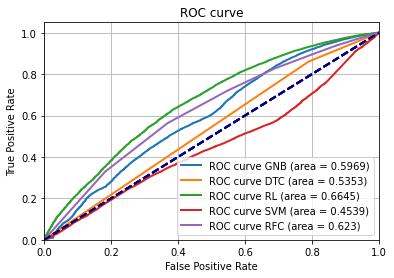

In [ ]:
labels=['Naive Bayes','Decision tree','Logistic Regresion',\
        'Support Vector Machines',
        'Random Forest']
fpr =[]
tpr = []
mod=''

#Complete el código
for i in range(len(labels)):
  fpr.append(0)
  tpr.append(0)
  if i==0:
    y_pred2 = gnb.predict_proba(X_test)
    mod='GNB'
  elif i==1:
    y_pred2 = dtc.predict_proba(X_test)
    mod='DTC'
  elif i==2:
    y_pred2 = rl.predict_proba(X_test)
    mod='RL'
  # elif i==3:
  #   y_pred2 = svc.predict_proba(X_test)
  #   mod='SVM'
  else:
    y_pred2 = rfc.predict_proba(X_test)
    mod='RFC'
  score = y_pred2[:,0]-y_pred2[:,1]
  fpr[i], tpr[i],_ = roc_curve(y_test,score)
  roc_auc = 1 - auc(fpr[i], tpr[i])
  plt.plot(tpr[i],fpr[i],lw=2, label='ROC curve {} (area = {})'.format(mod,round(roc_auc,4)))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve')
  plt.legend(loc="lower right")
  plt.grid()
plt.show()

## 6.2.Hyperparameter tunning

De acuerdo a la métrica ROC del modelo, se procede realizar optimización de hiperparametros solo para aquellos cuya área supere el 0.60, es decir: 


1.   Logistic Regresion
2.   Naive Bayes              
3.   Random Forest



In [ ]:
#Importar GridSearch 
from sklearn.model_selection import GridSearchCV

In [ ]:
def summarize_classification(y_test, y_pred):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print("Test data count: ",len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score_Validation : " , acc)
    print("precision_score : " , prec)
    print("recall_score : ", 1-recall)
    print()

### 6.2.1 Regresión Logística

In [ ]:
parameters = {'penalty': ['l1', 'l2'], 
              'C': [0.1, 0.4, 0.8, 1, 2, 5]}

grid_search_LR = GridSearchCV(LogisticRegression(solver='liblinear'), parameters, cv=3, \
                              return_train_score=True,  scoring='roc_auc')
grid_search_LR.fit(X_train,y_train)

grid_search_LR.best_params_

{'C': 0.4, 'penalty': 'l1'}

In [ ]:
# Para ver todos los resultados del cross validation
# Para ver como varia el modelo
for i in range(12):
    print('Parameters: ', grid_search_LR.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search_LR.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search_LR.cv_results_['rank_test_score'][i])

Parameters:  {'C': 0.1, 'penalty': 'l1'}
Mean Test Score:  0.7567827220894342
Rank:  8
Parameters:  {'C': 0.1, 'penalty': 'l2'}
Mean Test Score:  0.7566968178017861
Rank:  12
Parameters:  {'C': 0.4, 'penalty': 'l1'}
Mean Test Score:  0.7569007560745487
Rank:  1
Parameters:  {'C': 0.4, 'penalty': 'l2'}
Mean Test Score:  0.7567413939755433
Rank:  9
Parameters:  {'C': 0.8, 'penalty': 'l1'}
Mean Test Score:  0.7567324080451323
Rank:  11
Parameters:  {'C': 0.8, 'penalty': 'l2'}
Mean Test Score:  0.7567965572067118
Rank:  7
Parameters:  {'C': 1, 'penalty': 'l1'}
Mean Test Score:  0.7567405378797046
Rank:  10
Parameters:  {'C': 1, 'penalty': 'l2'}
Mean Test Score:  0.7568034285022572
Rank:  6
Parameters:  {'C': 2, 'penalty': 'l1'}
Mean Test Score:  0.7568742464492381
Rank:  2
Parameters:  {'C': 2, 'penalty': 'l2'}
Mean Test Score:  0.7568450731837294
Rank:  3
Parameters:  {'C': 5, 'penalty': 'l1'}
Mean Test Score:  0.7568359874946268
Rank:  4
Parameters:  {'C': 5, 'penalty': 'l2'}
Mean Test S

##### Resultado

Nota: La optimización para la Regresión Logística como meta de scoring='accurancy', los best_params_ resultantes eran de: {'C': 0.1, 'penalty': 'l2'}. Para el scoring='roc_auc', los best_params_ son {'C': 0.4, 'penalty': 'l1'}

In [ ]:
logistic_model = LogisticRegression(solver='liblinear', \
    penalty='l1', C=0.4). \
    fit(X_train, y_train)

In [ ]:
y_pred_LR = logistic_model.predict(X_test)

In [ ]:
summarize_classification(y_test, y_pred_LR)

Test data count:  88567
accuracy_count :  59632
accuracy_score_Validation :  0.6732981810380841
precision_score :  0.13344327398781677
recall_score :  0.4456096196868009



In [ ]:
print(f"accuracy_score_Training: {logistic_model.score(X_train, y_train)}")

accuracy_score_Training: 0.7146305128286115


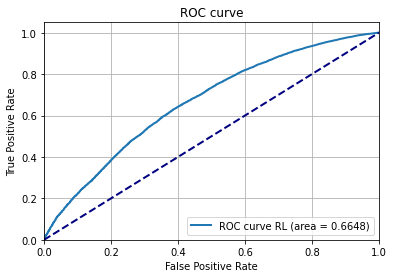

In [ ]:
y_pred2 = logistic_model.predict_proba(X_test)
mod='RL'
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
plt.plot(tpr,fpr,lw=2, label='ROC curve {} (area = {})'.format(mod,round(roc_auc,4)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
print(roc_auc)

0.6648119879010802


### 6.2.2 Árbol de Decisión

En las diferentes iteraciones el modelo ha tenido un desempeño muy pobre, por lo cual se descarta la optimización de hiperparametros para este modelo

In [ ]:
parameters = {'max_depth': [2, 4, 5, 7, 9, 10], 'criterion': ['entropy','gini']}

decision_tree = GridSearchCV(DecisionTreeClassifier(), parameters, cv=3, return_train_score=True)
decision_tree.fit(X_train, y_train)

decision_tree.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [ ]:
# Para ver todos los resultados del cross validation
# Para ver como varia el modelo
for i in range(12):
    print('Parameters: ', decision_tree.cv_results_['params'][i])
    print('Mean Test Score: ', decision_tree.cv_results_['mean_test_score'][i])
    print('Rank: ', decision_tree.cv_results_['rank_test_score'][i])

Parameters:  {'criterion': 'entropy', 'max_depth': 2}
Mean Test Score:  0.6502321468052178
Rank:  11
Parameters:  {'criterion': 'entropy', 'max_depth': 4}
Mean Test Score:  0.6930792878725667
Rank:  10
Parameters:  {'criterion': 'entropy', 'max_depth': 5}
Mean Test Score:  0.7154017034627249
Rank:  8
Parameters:  {'criterion': 'entropy', 'max_depth': 7}
Mean Test Score:  0.7586726045713443
Rank:  5
Parameters:  {'criterion': 'entropy', 'max_depth': 9}
Mean Test Score:  0.7815530147500079
Rank:  4
Parameters:  {'criterion': 'entropy', 'max_depth': 10}
Mean Test Score:  0.7934735689544444
Rank:  2
Parameters:  {'criterion': 'gini', 'max_depth': 2}
Mean Test Score:  0.650050535358959
Rank:  12
Parameters:  {'criterion': 'gini', 'max_depth': 4}
Mean Test Score:  0.7065080066959349
Rank:  9
Parameters:  {'criterion': 'gini', 'max_depth': 5}
Mean Test Score:  0.7197472179232074
Rank:  7
Parameters:  {'criterion': 'gini', 'max_depth': 7}
Mean Test Score:  0.7542533927123801
Rank:  6
Parameter

##### Resultado

Nota: Los best_params_ resultantes para el scoring='roc_auc', son {'max_depth': 10}

In [ ]:
decision_tree=DecisionTreeClassifier(max_depth=10,criterion='gini')
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
y_pred_dt = decision_tree.predict(X_test)

In [ ]:
summarize_classification(y_test, y_pred_dt)

Test data count:  88567
accuracy_count :  70592
accuracy_score_Validation :  0.7970463039280996
precision_score :  0.13179560454514527
recall_score :  0.7291666666666667



In [ ]:
print(f"accuracy_score_Training: {decision_tree.score(X_train, y_train)}")

accuracy_score_Training: 0.817704220755293


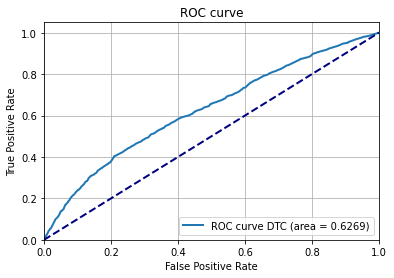

In [ ]:
y_pred2 = decision_tree.predict_proba(X_test)
mod='DTC'
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
plt.plot(tpr,fpr,lw=2, label='ROC curve {} (area = {})'.format(mod,round(roc_auc,4)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
print(roc_auc)

0.6268944508628905


### 6.2.3 Naive Bayes

Esta técnica no tiene hiperparametro por optimizar

In [ ]:
#priors calculation
y.value_counts()/len(y)

0    0.919247
1    0.080753
Name: TARGET, dtype: float64

In [ ]:
a,b = y.value_counts()/len(y)

In [ ]:
parameters = {'priors': [None, [a,b]]}

naive_bayes = GridSearchCV(GaussianNB(), parameters, cv=10, return_train_score=True)
naive_bayes.fit(X_train, y_train)

naive_bayes.best_params_

{'priors': [0.9192469370403867, 0.0807530629596133]}

In [ ]:
# Para ver todos los resultados del cross validation
# Para ver como varia el modelo
for i in range(2):
    print('Parameters: ', naive_bayes.cv_results_['params'][i])
    print('Mean Test Score: ', naive_bayes.cv_results_['mean_test_score'][i])
    print('Rank: ', naive_bayes.cv_results_['rank_test_score'][i])

Parameters:  {'priors': None}
Mean Test Score:  0.6705547215852941
Rank:  2
Parameters:  {'priors': [0.9192469370403867, 0.0807530629596133]}
Mean Test Score:  0.6995362295823353
Rank:  1


##### Resultado

Nota: Los best_params_ resultantes para el scoring='roc_auc', son {'max_depth': 10}

In [ ]:
NB_best = naive_bayes.best_estimator_
NB_best.fit(X_train,y_train)

GaussianNB(priors=[0.9192469370403867, 0.0807530629596133])

In [ ]:
y_pred_NB = NB_best.predict(X_test)

In [ ]:
summarize_classification(y_test, y_pred_NB)

Test data count:  88567
accuracy_count :  63492
accuracy_score_Validation :  0.7168810053405896
precision_score :  0.11996946694372589
recall_score :  0.6044463087248322



In [ ]:
print(f"accuracy_score_Training: {NB_best.score(X_train, y_train)}")

accuracy_score_Training: 0.7024625459292716


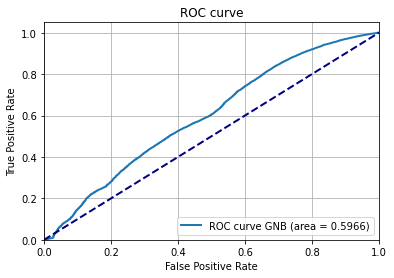

In [ ]:
y_pred2 = NB_best.predict_proba(X_test)
mod='GNB'
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
plt.plot(tpr,fpr,lw=2, label='ROC curve {} (area = {})'.format(mod,round(roc_auc,4)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
print(roc_auc)

0.596622205417022


### 6.2.4 Support Vector Machine

Se explora esta técnica, sin embargo, se descarta toda vez que requiere de más recursos para que converja. 

In [ ]:
parameters = {'kernel': ['linear', 'rbf', 'poly'], 
           'C': [0.1, 1.0, 10.0, 100.0, 1000.0], 
            'gamma': [0.1, 1, 10, 100]}

grid_search_svm = GridSearchCV(SVC(max_iter=2000, tol=1e-3), parameters, cv=5, scoring='roc_auc',
                            return_train_score=True, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

grid_search_svm.best_params_

In [ ]:
grid_search_svm.best_score_

In [ ]:
# Para ver todos los resultados del cross validation
# Para ver como varia el modelo
for i in range(12):
    print('Parameters: ', grid_search_svm.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search_svm.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search_svm.cv_results_['rank_test_score'][i])

##### Resultado

In [ ]:
svc = SVC(C=0.1, kernel='linear', max_iter=2000, tol=1e-3,gamma=0.1,probability=True)
svc.fit(X_train,y_train) 

In [ ]:
y_pred_svc = svc.predict(X_test)

In [ ]:
summarize_classification(y_test, y_pred_svc)

In [ ]:
print(f"accuracy_score_Training: {svc.score(X_train, y_train)}")

In [ ]:
y_pred2 = svc.predict_proba(X_test)
mod='SVM'
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
plt.plot(tpr,fpr,lw=2, label='ROC curve {} (area = {})'.format(mod,round(roc_auc,4)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
print(roc_auc)

### 6.2.5 Random Forest

#### Búsqueda basada en métrica out-of-bag

In [ ]:
import pandas as pd
import numpy as np
import typing
from typing import Optional, Union, Tuple
import logging
import tqdm

from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.metrics import  mean_absolute_error, mean_squared_error


logging.basicConfig(
    format = '%(asctime)-5s %(name)-10s %(levelname)-5s %(message)s', 
    level  = logging.INFO,
)


def check_early_stopping(
    scores: Union[list, np.ndarray],
    metric: str,
    stopping_rounds: int=4,
    stopping_tolerance: float=0.01,
    max_runtime_sec: int=None,
    start_time: pd.Timestamp=None) -> bool:
    
    """
    Check if early stopping condition is met.
    
    Parameters
    ----------
    
    scores: list, np.ndarray
        Scores used to evaluate early stopping conditions.
        
    metric: str
        Metric which scores referes to. Used to determine if higher score
        means a better model or the opposite.
        
    stopping_rounds: int, default 4
        Number of consecutive rounds without improvement needed to stop
        the training.
    
    stopping_tolerance: float, default 0.01
        Minimum percentage of positive change between two consecutive rounds
        needed to consider it as an improvement.
    
    max_runtime_sec: int, default `None`
        Maximum allowed runtime in seconds for model training. `None` means unlimited.
    
    start_time: pd.Timestamp, default `None`
        Time when training started. Used to determine if `max_runtime_sec` has been
        reached.
        
        
    Returns
    ------
    bool:
        `True` if any condition needed for early stopping is met. `False` otherwise.
        
    Notes
    -----
    
    Example of early stopping:
        
    Stop after 4 rounds without an improvement of 1% or higher: `stopping_rounds` = 4,
    `stopping_tolerance` = 0.01, `max_runtime_sec` = None.
    
    """
    
    allowed_metrics = ['accuracy', 'auc', 'f1', 'mse', 'mae', 'squared_error',
                       'absolute_error']
    
    if metric not in allowed_metrics:
        raise Exception(
                f"`metric` argument must be one of: {allowed_metrics}. "
                f"Got {metric}"
        )
    
    if isinstance(scores, list):
        scores = np.array(scores)
        
    if max_runtime_sec is not None:
        
        if start_time is None:
            start_time = pd.Timestamp.now()
            
        runing_time = (pd.Timestamp.now() - start_time).total_seconds()
        
        if runing_time > max_runtime_sec:
            logging.debug(
                f"Reached maximum time for training ({max_runtime_sec} seconds). "
                f"Early stopping activated."
            )
            return True
        
    if len(scores) < stopping_rounds:
        return False
    
    if metric in ['accuracy', 'auc', 'f1']:
        # The higher the metric, the better
        diff_scores = scores[1:] - scores[:-1]
        improvement = diff_scores / scores[:-1]
        
    if metric in ['mse', 'mae', 'squared_error', 'absolute_error']:
        # The lower the metric, the better
        
        # scores = -1 * scores 
        # diff_scores = scores[:-1] - scores[1:]
        # improvement = diff_scores / scores[1:]
        diff_scores = scores[1:] - scores[:-1]
        improvement = diff_scores / scores[:-1]
        improvement = -1 * improvement
        
    improvement = np.hstack((np.nan, improvement))
    logging.debug(f"Improvement: {improvement}")
    
    if (improvement[-stopping_rounds:] < stopping_tolerance).all():
        return True
    else:
        return False


    
def fit_RandomForest_early_stopping(
    model: Union[RandomForestClassifier, RandomForestRegressor],
    X: Union[np.ndarray, pd.core.frame.DataFrame],
    y: np.ndarray,
    metric: str,
    positive_class: int=1,
    score_tree_interval: int=None,
    stopping_rounds: int=4,
    stopping_tolerance: float=0.01,
    max_runtime_sec: int=None) -> np.ndarray:
    
    """
    Fit a RandomForest model until an early stopping condition is met or
    `n_estimatos` is reached.
    
    Parameters
    ----------
    
    model: RandomForestClassifier, RandomForestRegressor
        Model to be fitted.
        
    X: np.ndarray, pd.core.frame.DataFrame
        Training input samples. 
    
    y: np.ndarray, pd.core.frame.DataFrame
        Target value of the input samples. 
    
    scores: list, np.ndarray
        Scores used to evaluate early stopping conditions.
        
    metric: str
        Metric used to generate the score. Used to determine if higher score
        means a better model or the opposite.
        
    score_tree_interval: int, default `None`
        Score the model after this many trees. If `None`, the model is scored after
        `n_estimators` / 10.
        
    stopping_rounds: int
        Number of consecutive rounds without improvement needed to stop the training.
    
    stopping_tolerance: float, default 0.01
        Minimum percentage of positive change between two consecutive rounds
        needed to consider it as an improvement. 
    
    max_runtime_sec: int, default `None`
        Maximum allowed runtime in seconds for model training. `None` means unlimited.
        
        
    Returns
    ------
    oob_scores: np.ndarray
        Out of bag score for each scoring point.
    
    """
    
    if score_tree_interval is None:
        score_tree_interval = int(model.n_estimators / 10)
        
    allowed_metrics = ['accuracy', 'auc', 'f1', 'mse', 'mae', 'squared_error',
                       'absolute_error']
    
    if metric not in allowed_metrics:
        raise Exception(
                f"`metric` argument must be one of: {allowed_metrics}. "
                f"Got {metric}"
        )
    
    if not model.oob_score:
        model.set_params(oob_score=True)
        
    start_time = pd.Timestamp.now()
    oob_scores = []
    scoring_points = np.arange(0, model.n_estimators + 1, score_tree_interval)[1:]
    scoring_points = np.hstack((1, scoring_points))
    
    metrics = {
        'auc' : roc_auc_score,
        'accuracy' : accuracy_score,
        'f1': f1_score,
        'mse': mean_squared_error,
        'squared_error': mean_squared_error,
        'mae': mean_absolute_error,
        'absolute_error': mean_absolute_error,        
    }
    
    for i, n_estimators in enumerate(scoring_points):
        
        logging.debug(f"Training with n_stimators: {n_estimators}")
        model.set_params(n_estimators=n_estimators)
        model.fit(X=X, y=y)
        
        if metric == 'auc':
            oob_predictions = model.oob_decision_function_[:, positive_class]
            # If n_estimators is small it might be possible that a data point
            # was never left out during the bootstrap. In this case,
            # oob_decision_function_ might contain NaN.
            oob_score = metrics[metric](
                            y_true=y[~np.isnan(oob_predictions)],
                            y_score=oob_predictions[~np.isnan(oob_predictions)]
                        )
        else:
            oob_predictions = model.oob_decision_function_
            oob_predictions = np.argmax(oob_predictions, axis=1)
            oob_score = metrics[metric](
                            y_true=y[~np.isnan(oob_predictions)],
                            y_score=oob_predictions[~np.isnan(oob_predictions)]
                        )
            
        oob_scores.append(oob_score)
        
        early_stopping = check_early_stopping(
                            scores             = oob_scores,
                            metric             = metric,
                            stopping_rounds    = stopping_rounds,
                            stopping_tolerance = stopping_tolerance,
                            max_runtime_sec    = max_runtime_sec,
                            start_time         = start_time
                         )    
        
        if early_stopping:
            logging.debug(
                f"Early stopping activated at round {i + 1}: n_estimators = {n_estimators}"
            )
            break
        
    logging.debug(f"Out of bag score = {oob_scores[-1]}")
    
    return np.array(oob_scores), scoring_points[:len(oob_scores)]
    

def custom_gridsearch_RandomForestClassifier(
    model: RandomForestClassifier,
    X: Union[np.ndarray, pd.core.frame.DataFrame],
    y: np.ndarray,
    metric: str,
    param_grid: dict,
    positive_class: int=1,
    score_tree_interval: int=None,
    stopping_rounds: int=5,
    stopping_tolerance: float=0.01,
    model_max_runtime_sec: int=None,
    max_models: int=None,
    max_runtime_sec: int=None,
    return_best: bool=True) -> Tuple[pd.DataFrame, pd.DataFrame]:
    
    '''
    Grid search for RandomForestClassifier model based on out-of-bag metric and 
    early stopping for each model fit.
    
    Parameters
    ----------
    
    model: RandomForestClassifier
        Model to search over.
           
    X: np.ndarray, pd.core.frame.DataFrame
        The training input samples. 
    
    y: np.ndarray, pd.core.frame.DataFrame
        The target of input samples. 
    
    scores: list, np.ndarray
        Scores used to evaluate early stopping conditions.
        
    metric: str
        Metric used to generate the score. I is used to determine if higher score
        means a better model or the opposite.
        
    score_tree_interval: int, default `None`
        Score the model after this many trees. If `None`, the model is scored after
        `n_estimators` / 10.
        
    stopping_rounds: int
        Number of consecutive rounds without improvement needed to stop the training.
    
    stopping_tolerance: float, default 0.01
        Minimum percentage of positive change between two consecutive rounds
        needed to consider it as an improvement. 
    
    model_max_runtime_sec: int, default `None`
        Maximum allowed runtime in seconds for model training. `None` means unlimited.
        
    max_models: int, default `None`
        Maximum number of models trained during the search.
    
    max_runtime_sec: int, default `None`
        Maximum number of seconds for the search.
        
    return_best : bool
        Refit model using the best found parameters on the whole data.
        
        
    Returns
    ------
    
    results: pd.DataFrame
    
    '''
    
    results = {'params': [], 'oob_metric': []}
    start_time = pd.Timestamp.now()
    history_scores = {}
    history_scoring_points = np.array([], dtype = int)
    param_grid = list(ParameterGrid(param_grid))
    
    if not model.oob_score:
        model.set_params(oob_score=True)
    
    if max_models is not None and max_models < len(param_grid):
        param_grid = np.random.choice(param_grid, max_models)

    for params in tqdm.tqdm(param_grid):
        
        if max_runtime_sec is not None:
            runing_time = (pd.Timestamp.now() - start_time).total_seconds()
            if runing_time > max_runtime_sec:
                logging.info(
                    f"Reached maximum time for GridSearch ({max_runtime_sec} seconds). "
                    f"Search stopped."
                )
                break   
        
        model.set_params(**params)

        oob_scores, scoring_points = fit_RandomForest_early_stopping(
                                        model = clone(model), # Clone to avoid modification of n_estimators
                                        X = X,
                                        y = y,
                                        metric = metric,
                                        positive_class      = positive_class,
                                        score_tree_interval = score_tree_interval,
                                        stopping_rounds     = stopping_rounds,
                                        stopping_tolerance  = stopping_tolerance,
                                        max_runtime_sec     = model_max_runtime_sec
                                     )
      
        history_scoring_points = np.union1d(history_scoring_points,  scoring_points)        
        history_scores[str(params)] = oob_scores
        params['n_estimators'] = scoring_points[-1]
        results['params'].append(params)
        results['oob_metric'].append(oob_scores[-1])
        logging.debug(f"Modelo: {params} \u2713")

    results = pd.DataFrame(results)
    history_scores = pd.DataFrame(
                            dict([(k, pd.Series(v)) for k,v in history_scores.items()])
                         )
    history_scores['n_estimators'] = history_scoring_points
    
    if metric in ['accuracy', 'auc', 'f1']:
        results = results.sort_values('oob_metric', ascending=False)
    else:
        results = results.sort_values('oob_metric', ascending=True)
        
    results = results.rename(columns = {'oob_metric': f'oob_{metric}'})
    
    if return_best:
        best_params = results['params'].iloc[0]
        print(
            f"Refitting mode using the best found parameters and the whole data set: \n {best_params}"
        )
        
        model.set_params(**best_params)
        model.fit(X=X, y=y)
        
    results = pd.concat([results, results['params'].apply(pd.Series)], axis=1)
    results = results.drop(columns = 'params')
    
    return results, history_scores

In [ ]:
# Grid de valores sobre los que buscar
param_grid = {
             'max_depth'   : [4,5,6,7,8],
             'min_samples_leaf': [0.05, 0.1],
             'max_features': ['sqrt', 'log2','auto'],
             'criterion' :['gini', 'entropy'],
             'ccp_alpha': [0, 0.01]
            }
# Modelo
model = RandomForestClassifier(
            n_estimators = 1000,
            oob_score    = True,
            n_jobs       = -1,
            random_state = 123
        )

# # Búsqueda de mejor modelo basada en métrica out-of-bag
# start = pd.Timestamp.now()

resultados, history = custom_gridsearch_RandomForestClassifier(
                        model                 = model,
                        X                     = X,
                        y                     = y,
                        metric                = 'auc',
                        param_grid            = param_grid,
                        positive_class        = 1,
                        score_tree_interval   = 50,
                        stopping_rounds       = 4,
                        stopping_tolerance    = 0.01,
                        model_max_runtime_sec = None,
                        max_models            = None,
                        max_runtime_sec       = None,
                        return_best           = True
                      )

# end = pd.Timestamp.now()
# print(f"Duración búsqueda: {end-start}")

# https://www.cienciadedatos.net/documentos/py36-grid-search-random-forest-out-of-bag-error-early-stopping.html

  0%|          | 0/120 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
  1%|          | 1/120 [01:41<3:20:54, 101.30s/it]/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
  2%|▏         | 2/120 [03:04<2:58:15, 90.64s/it] /usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
  2%|▎         | 3/120 [04:46<3:06:42, 95.75s/it]/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees 

Refitting mode using the best found parameters and the whole data set: 
 {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 0.05, 'n_estimators': 250}


In [ ]:
resultados

,oob_auc,ccp_alpha,criterion,max_depth,max_features,min_samples_leaf,n_estimators
10,0.698367,0.00,gini,5,auto,0.05,250
8,0.698367,0.00,gini,5,log2,0.05,250
6,0.698367,0.00,gini,5,sqrt,0.05,250
22,0.698345,0.00,gini,7,auto,0.05,250
18,0.698345,0.00,gini,7,sqrt,0.05,250
...,...,...,...,...,...,...,...
84,0.479603,0.01,gini,8,sqrt,0.05,200
85,0.479603,0.01,gini,8,sqrt,0.10,200
86,0.479603,0.01,gini,8,log2,0.05,200
87,0.479603,0.01,gini,8,log2,0.10,200


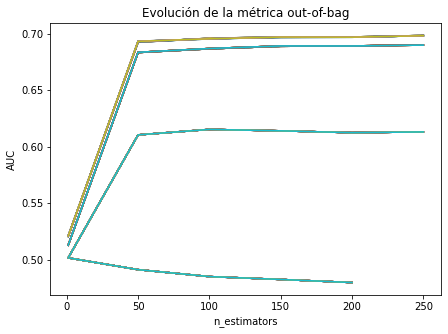

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
history.set_index('n_estimators').plot(legend=False, ax=ax)
ax.set_ylabel('AUC');
ax.set_title('Evolución de la métrica out-of-bag');

##### Resultado

{'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 0.05, 'n_estimators': 250}

In [ ]:
rfc = RandomForestClassifier(n_estimators = 250, criterion = 'gini', max_depth=5, max_features='auto', min_samples_leaf=0.05,\
                             ccp_alpha=0) 
rfc.fit(X_train,y_train) 

RandomForestClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=0.05,
                       n_estimators=250)

In [ ]:
y_pred_rfc = rfc.predict(X_test)

In [ ]:
summarize_classification(y_test, y_pred_rfc)

Test data count:  88567
accuracy_count :  63666
accuracy_score_Validation :  0.7188456197003399
precision_score :  0.14156468354941637
recall_score :  0.5099272930648769



In [ ]:
print(f"accuracy_score_Training: {rfc.score(X_train, y_train)}")

accuracy_score_Training: 0.7534822020782667


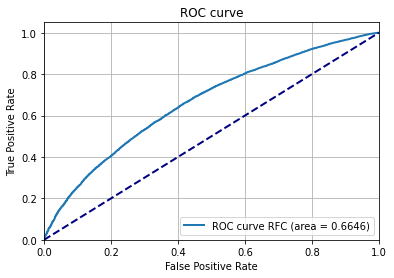

In [ ]:
y_pred2 = rfc.predict_proba(X_test)
mod='RFC'
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
plt.plot(tpr,fpr,lw=2, label='ROC curve {} (area = {})'.format(mod,round(roc_auc,4)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
print(roc_auc)


0.6646417210425608


#7.Cross Validation

Se analiza la varianza de los resultados para las 3 mejores técnicas

In [ ]:
# Grabar los resultados de cada modelo
from sklearn import model_selection

models = []

#Logistic Regression
# models.append(('Logistic Regression', LogisticRegression(solver='liblinear',  penalty='l1', C=0.4)))

# Decision Tree Classifier
models.append(('Decision Tree', DecisionTreeClassifier(max_depth=10,criterion='gini')))

# Random Forest
models.append(('Random Forest', RandomForestClassifier(n_estimators = 250, criterion = 'gini', max_depth=5, max_features='auto', min_samples_leaf=0.05,\
                             ccp_alpha=0)))

Nota: 
No se logra realizar el Logistic Regression ganador, toda vez que genera error: "*ValueError: Only one class present in y_true. ROC AUC score is not defined in that case* ".

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    # Kfol cross validation for model selection
    kfold = model_selection.KFold(n_splits=10)
    #X train , y train
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"({name}, {cv_results.mean()}, {cv_results.std()}"
    print(msg)

(Decision Tree, 0.6784066262909768, 0.006063523312978609
(Random Forest, 0.6987183078449334, 0.004524402832645564


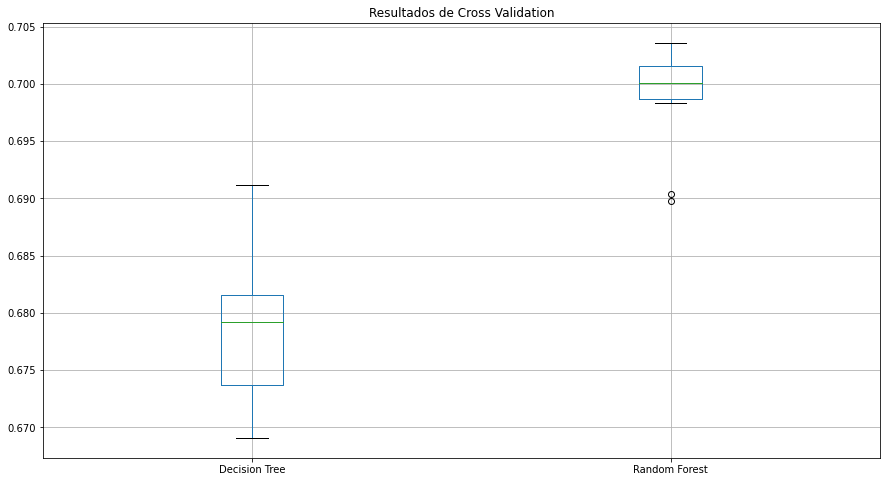

In [ ]:
plt.figure(figsize = (15,8)) 
result_df = pd.DataFrame(results, index=names).T
result_df.boxplot()
plt.title("Resultados de Cross Validation");

# 8.Evaluación Final sobre el Conjunto de Test

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve

##### Para el modelo ganador: Random Forest Classifier según optimización de parámetros

In [ ]:
rfc = RandomForestClassifier(n_estimators = 250, criterion = 'gini', max_depth=5, max_features='auto', min_samples_leaf=0.05,\
                             ccp_alpha=0) 
rfc.fit(X_train,y_train) 

RandomForestClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=0.05,
                       n_estimators=250)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.73      0.83     81415
           1       0.14      0.49      0.22      7152

    accuracy                           0.72     88567
   macro avg       0.54      0.61      0.52     88567
weighted avg       0.88      0.72      0.78     88567



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


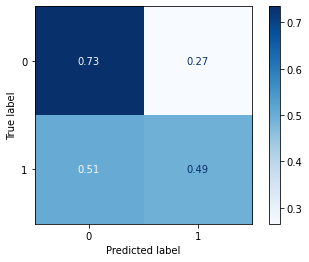

In [ ]:
plot_confusion_matrix(rfc, X_test, y_test,cmap=plt.cm.Blues,normalize='true');

In [ ]:
#Cálculo del Recall
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp+fn)
sensitivity

0.49482662192393734

In [ ]:
Negative_predictive_value = tn /(tn+fn)
Negative_predictive_value

0.943017112215125

Precision nos da la calidad de la predicción: ¿qué porcentaje de los que hemos dicho que son la clase positiva, en realidad lo son?

Recall nos da la cantidad: ¿qué porcentaje de la clase positiva hemos sido capaces de identificar?